In [11]:
from random import shuffle
def sign(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0

class MyGDRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coefficients = []
        self.delta = 1

    def fit(self, x, y, learning_rate=0.0001, no_epochs=10000, batch_size=32):
        self.coefficients = [0.0 for _ in range(len(x[0]) + 1)]  # coefficients initialization
        n_samples = len(x)

        for epoch in range(no_epochs):
            for i in range(0, n_samples, batch_size):
                x_batch = x[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                gradients = self.compute_gradients2(x_batch, y_batch)

                for j in range(len(x[0])):
                    self.coefficients[j] -= learning_rate * gradients[j]
                self.coefficients[-1] -= learning_rate * gradients[-1]

        self.intercept_ = self.coefficients[-1]
        self.coefficients = self.coefficients[:-1]

    def eval(self, xi):
        yi = self.coefficients[-1]
        for j in range(len(xi)):
            yi += self.coefficients[j] * xi[j]
        return yi

    def predict(self, x):
        y_computed = [self.eval(xi) for xi in x]
        return y_computed

    def compute_gradients(self, x, y):
        gradients = [0 for _ in range(len(x[0]) + 1)]
        for i in range(len(x)):
            y_computed = self.eval(x[i])
            crt_error = y_computed - y[i]
            for j in range(len(x[0])):
                gradients[j] += crt_error * x[i][j]
            gradients[-1] += crt_error
        for j in range(len(gradients)):
            gradients[j] /= len(x)
        return gradients
    
    def compute_gradients2(self, x, y):
        gradients = [0 for _ in range(len(x[0]) + 1)]

        for i in range(len(x)):
            y_computed = self.eval(x[i])
            crt_error = y_computed - y[i]

            if abs(crt_error) <= self.delta:
                for j in range(len(x[0])):
                    gradients[j] += crt_error * crt_error * x[i][j]
                gradients[-1] += crt_error
            else:
                for j in range(len(x[0])):
                    gradients[j] += (self.delta * sign(crt_error) - 1 / 2 * (self.delta ** 2)) * x[i][j] 
                gradients[-1] += self.delta * sign(crt_error)

        for j in range(len(gradients)):
            gradients[j] /= len(x)

        return gradients

In [12]:
import os
import csv

from matplotlib import pyplot as plt


def load_data(file_name, input_variable_name, output_variable_name):
    data = []
    data_names = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1
    selected_variable = data_names.index(input_variable_name)
    input_list = [float(data[i][selected_variable]) for i in range(len(data))]
    selected_output = data_names.index(output_variable_name)
    output_list = [float(data[i][selected_output]) for i in range(len(data))]

    return input_list, output_list


crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = load_data(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
inputs = [[d] for d in inputs]
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[1.61646318435669], [1.48238301277161], [1.480633020401], [1.56497955322266], [1.44357192516327]]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


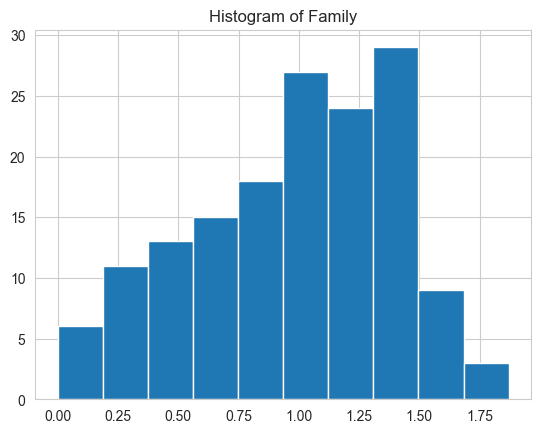

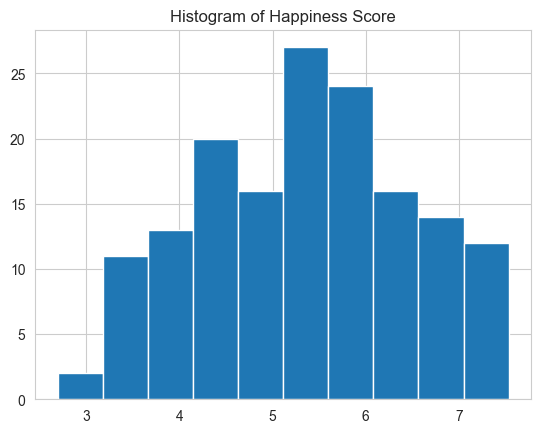

In [13]:
def plot_histogram(data, variable_name):
    _ = plt.hist(data, 10)
    plt.title("Histogram of " + variable_name)
    plt.show()


plot_histogram([d[0] for d in inputs], 'Family')
plot_histogram(outputs, 'Happiness Score')

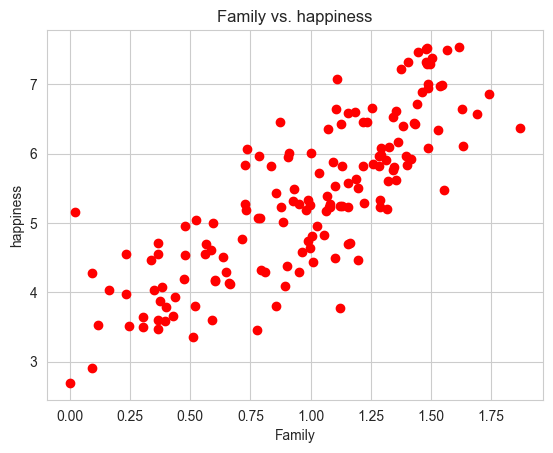

In [14]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.title('Family vs. happiness')
plt.show()

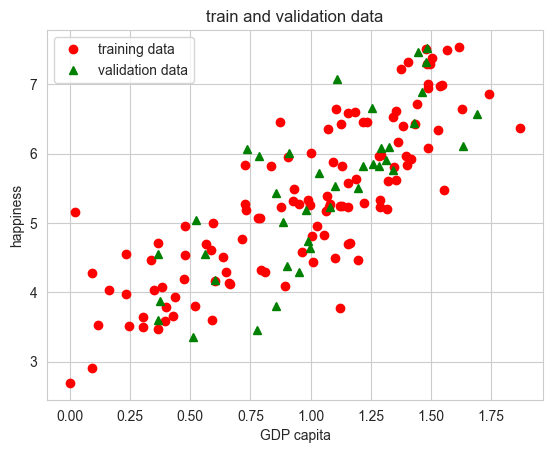

In [15]:
import random

indexes = [i for i in range(len(inputs))]
train_sample = random.sample(indexes, k=int(0.75 * len(indexes)))
validation_sample = [i for i in indexes if not i in train_sample]

train_inputs = [inputs[i] for i in train_sample]
train_outputs = [outputs[i] for i in train_sample]

validation_inputs = [inputs[i] for i in validation_sample]
validation_outputs = [outputs[i] for i in validation_sample]

plt.plot(train_inputs, train_outputs, 'ro', label='training data')  #train data are plotted by red and circle sign
plt.plot(validation_inputs, validation_outputs, 'g^',
         label='validation data')  #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [16]:
regressor = MyGDRegression()

regressor.fit(train_inputs, train_outputs)

predicted = regressor.predict(validation_inputs)
print(predicted)

[6.40310832256853, 6.30299822803665, 6.394909387280668, 5.441818521513668, 6.355125302209178, 5.810877616272737, 6.944514793306212, 6.27037252931005, 6.791490140605697, 5.998166586292255, 5.910006815081229, 4.48122426469904, 4.926136271739759, 4.607981821388863, 5.970279936120125, 5.831420155643233, 5.720338173587326, 5.892830070252457, 6.038953398935552, 5.249700715619541, 5.421432802462582, 5.670272825378836, 4.791786459154641, 5.363578404232481, 5.1134664455294905, 3.932876803627858, 4.86328068902912, 5.132276581606716, 5.149019456885105, 4.025131891356717, 3.5263522583434175, 4.902437185332161, 5.031449264731648, 4.13493640279106, 3.5488860314069126, 4.793666765533471, 3.5302206466343233, 4.584024288945059, 3.89785406019543]


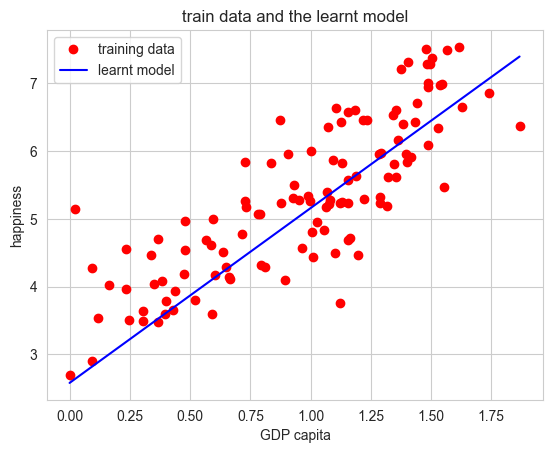

In [17]:
no_of_points = 1000
xref = []
t = [d[0] for d in train_inputs]
val = min(t)
step = (max(t) - min(t)) / no_of_points
for i in range(1, no_of_points):
    xref.append(val)
    val += step
yref = [regressor.eval([el]) for el in xref]

plt.plot(train_inputs, train_outputs, 'ro', label='training data')
plt.plot(xref, yref, 'b-', label='learnt model')
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

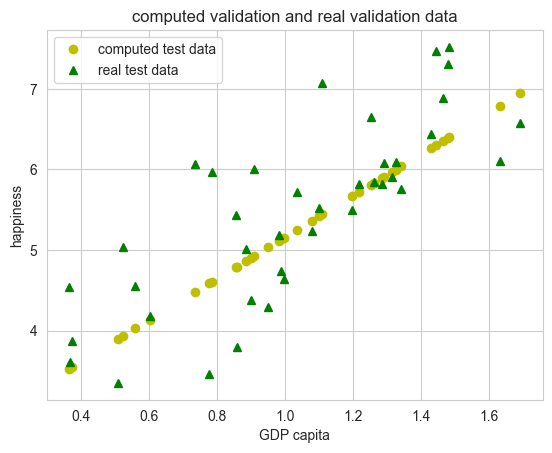

In [18]:
computed_validation_outputs = regressor.predict(validation_inputs)

plt.plot(validation_inputs, computed_validation_outputs, 'yo', label='computed test data')
plt.plot(validation_inputs, validation_outputs, 'g^', label='real test data')
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [19]:
def compute_error():
    error = 0.0
    for t1, t2 in zip(computed_validation_outputs, validation_outputs):
        error += (t1 - t2) ** 2
    error = error / len(validation_outputs)
    print('prediction error (manual): ', error)
    
    error2 = 0.0
    for t1, t2 in zip(computed_validation_outputs, validation_outputs):
        error2 += abs(t1 - t2)
    error2 = error2 / len(validation_outputs)
    print('predicition error2 (manual with MAE)', error2)
    
compute_error()

prediction error (manual):  0.5289446119090836
predicition error2 (manual with MAE) 0.5633356894213067


In [20]:
n_folds = 3
n_sample = len(inputs)
fold_size = n_sample // n_folds

indexes = [i for i in range(n_sample)]
shuffle(indexes)

for i in range(n_folds):
    validation_indices = indexes[i * fold_size: (i + 1) * fold_size]
    train_indices = [idx for idx in indexes if idx not in validation_indices]
    for j in range(i * fold_size):
        train_indices.append(j)
    for j in range((i + 1) * fold_size, n_sample):
        train_indices.append(j)
    
    train_inputs_v = [inputs[i] for i in train_indices]
    train_outputs_v = [outputs[i] for i in train_indices]

    validation_inputs_v = [inputs[i] for i in validation_indices]
    validation_outputs_v = [outputs[i] for i in validation_indices]
        
    model = MyGDRegression()
    model.fit(train_inputs_v, train_outputs_v)
    prediction = model.predict(validation_inputs_v)
    
    error = 0.0
    for t1, t2 in zip(prediction, validation_outputs_v):
        error += (t1 - t2) ** 2
    error = error / len(validation_outputs_v)
    print('prediction error (manual): ', error)
    
    error2 = 0.0
    for t1, t2 in zip(prediction, validation_outputs_v):
        error2 += abs(t1 - t2)
    error2 = error2 / len(validation_outputs_v)
    print('predicition error2 (manual with MAE)', error2)


prediction error (manual):  1.1555424591239207
predicition error2 (manual with MAE) 0.9018301281787348
prediction error (manual):  0.9838039049062439
predicition error2 (manual with MAE) 0.8209532289106638
prediction error (manual):  1.1090169644180268
predicition error2 (manual with MAE) 0.878103356908182
